# Sorting algorithms
### General definition:
The objective of a sorting algorithm it to put a list of values in either ascending or descending order.
The efficiency of a sorting algorithm is evaluated by how little the process uses time and resources(memory). In the modern world memory is not as much of an issue as time. This project is meant to implement and then assess different sorting algorithms.
## Implementing the different algorithms
 in this section we will implement the following algorithms in python(version 3.9):
 - Bubble sort
 - Merge sort
 - Quick sort
 - Insertion sort
 - Heap sort
 - Selection sort

### Bubble sort:
The way bubble sort function is by repeatably going through the list and comparing each element with the next. 
Swapping them when necessary until it passes through th full list without the need to swap any elements.
Meaning the list is fully sorted.

In [7]:
def bubble_sort(array):
    sorted=False
    array_size=len(array)
    while(not sorted):
        sorted=True
        for i in range(array_size-1):
            if(array[i]>array[i+1]):
                array[i+1],array[i]=array[i],array[i+1]
                sorted=False
    return array

- Complexity: $O(n^2)$

### Merge sort 


Merge sort is a divide and conquer algorithm that was invented by the famous physicians John von Neumann in 1945. 
It functions by continually splitting the list into sub lists until they are one element.
Then merging each of the sub lists into a new sorted list.

In [8]:
def merge_sort(array):
    length=len(array)
    if(length==1):
        return array
    array1=merge_sort(array[:length//2])
    array2=merge_sort(array[length//2:])
    result_array=[]
    while(len(array1) and len(array2)):
        if(array1[0]<array2[0]):
           result_array.append(array1.pop(0))
        else:
           result_array.append(array2.pop(0))
    results_array=result_array+array1+array2
    return results_array


- Complexity: $O(n\log n)$

### Quick sort

Quick sort is a sorting algorithm developer by Tony Hoare in 1959 and still in use today.
It is another divide and conquer algorithm it works by choosing a pivot The splitting the list into two depending on if the are greater or less then the pivot.

In [9]:
def quick_sort(array):
    if(len(array)==1):
        return array
    popped=array.pop()
    sorted_array=quick_sort(array)
    length=len(sorted_array)
    if(popped>=sorted_array[length-1]):
        sorted_array.append(popped)
        return sorted_array
    high,low=length-1,0
    ## Using binary search to find the right placement
    while(low<high):
        mid=(high+low)//2
        if(popped<=sorted_array[mid]):
            high=mid
        else:
            low=mid+1
    
    sorted_array.insert(low,popped)
    return sorted_array


- Complexity: $O(n\log n)$

### Insertion sort

Insertion sort is a sorting algorithm that is so simple it could be implemented in three line in C++.
It function by going through the list and inserting each element into the part of the list is already ordered manner. 

In [10]:

def insertion_sort(array):
    length=len(array)
    for i in range(1,length):
        j=i
        while(j>0 and array[j-1]>array[j]):
            array[j-1],array[j]=array[j],array[j-1]
            j-=1
    return array

- Complexity: $O(n^2)$

###  Heap sort

Heap sort is an improved version of selection sort.
it is based on the binary heap data structure which is a binary tree where The descendent of each element are smaller then them.



In [11]:
def heapify(arr,length , root):
    ## creates a heap assuming the two subtrees are already a heap
    largest = root
    left  = 2*root+1
    right = 2*root+2
    if left < length and arr[largest] < arr[left]:
        largest = left
    if right < length and arr[largest] < arr[right]:
        largest = right
    if largest != root:
        arr[root], arr[largest] = arr[largest], arr[root]
        heapify(arr, length, largest)


def heap_sort(arr):
    length = len(arr)
    heapify(arr,length,1)
    ## creating the heap from the bottom up (igonring the leafs)
    for i in range(length//2 - 1, -1, -1):
        heapify(arr, length, i)

    # extracting the sorted array from the heap
    for i in range(length-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

### Selection sort

Selection sort is another simple sorting algorithm.
It function by dividing the list into two parts. 
An orders section that is built from the left to right.
And an unordered section where the algorithm searches for the minimum value each time.


In [12]:

def selection_sort(array):
    length=len(array)
    if (length == 1):
        return array
    min_index = 0

    for i in range(length):
        if (array[i] < array[min_index]):
            min_index = i

    min = array.pop(min_index)
    array = selection_sort(array)
    array.insert(0, min)
    return array


## Comparing The Algorithms

To study the time complexity of these function. we created a function that logs the durations these algorithms take to sort a randomly generated set of lists 



In [23]:


import pandas as pd
from random import random
from math import floor
import matplotlib.pyplot as plt
import time
def run_algo(sort_name, arr):
    if sort_name == "bubble":
        bubble_sort(arr)
    if sort_name == "new_quick":
        quick_sort(arr)
    if sort_name == "merge":
        merge_sort(arr)
    if sort_name == "insertion":
        insertion_sort(arr)
    if sort_name == "heap":
        heap_sort(arr)
    if sort_name == "selection":
        selection_sort(arr)


MAX_ARRAY_SIZE = 7000
MAX_NUMBER = 1_000
NUMBER_OF_SAMPLES = 5
STEP = 10


def study(max_array_size=MAX_ARRAY_SIZE,
          min_array_size=0,
          max_number=MAX_NUMBER,
          number_or_samples=NUMBER_OF_SAMPLES,
          step=STEP,
          algo_name="bubble",
          array_sizes=[],
          durations=[],
          ):
    execution_time = 0
    for array_size in range(max_array_size, min_array_size, -step):
        for i in range(number_or_samples, 0, -1):
            start = time.time()
            ## Estimating the duration left
            print(f' {floor((max_array_size-array_size)*100/max_array_size)}%' +
                  f' ETA:{floor(number_or_samples*array_size*execution_time/step)}s', end='  \r')

            arr = [floor(max_number*random()) for _ in range(array_size)]
            run_algo(algo_name, arr)
            end = time.time()
            execution_time = end-start
            array_sizes.append(array_size)
            durations.append(execution_time)


### showcase of the study function

In [24]:
times = {}
arr_sizes = []
durations = []
algo_name = "insertion"
study(array_sizes=arr_sizes,
      durations=durations,
      min_array_size=0,
      max_array_size=2000,
      algo_name=algo_name,
        )

times["array sizes"] = arr_sizes
times["durations"] = durations
df = pd.DataFrame(times)
print(df)

     array sizes  durations
0           2000   0.339834
1           2000   0.162678
2           2000   0.171458
3           2000   0.167129
4           2000   0.168194
..           ...        ...
995           10   0.000009
996           10   0.000008
997           10   0.000008
998           10   0.000009
999           10   0.000008

[1000 rows x 2 columns]


### visualizing the results

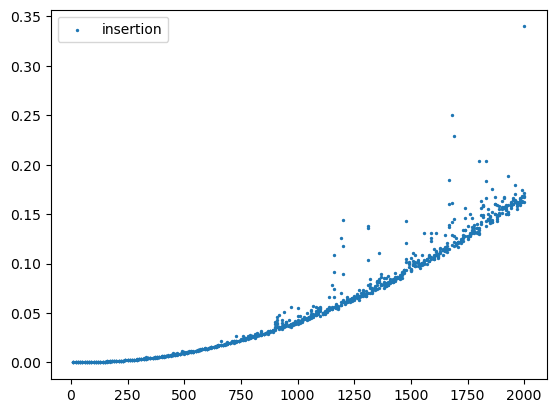

In [26]:

fig, axes = plt.subplots()
axes.scatter(df["array sizes"], df["durations"],label=f'{algo_name}',sizes=[2])
plt.legend()
plt.show()

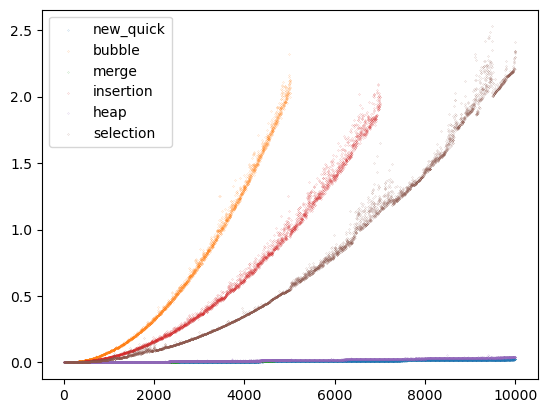

In [33]:
sorts=["new_quick","bubble","merge","insertion","heap","selection"]
fig, axes = plt.subplots()
for sort in sorts:
    df = pd.read_csv(f'data/{sort}.csv')
    axes.scatter(df["array sizes"], df["durations"],label=f'{sort}',sizes=[0.01])
plt.legend()
plt.show()

